In [1]:
# Installs the Kaggle command-line tool, which is used to interact with the Kaggle platform and download datasets.
# -q is used to speed up installation by reducing the amount of text displayed in the output and only show error if occur.
!pip install -q kaggle
# upload kaggle api .json file to download dataset
from google.colab import files
files.upload()
# make a directory in file system used to store the Kaggle API token, which is required to authenticate with the Kaggle platform and interact with the Kaggle API.
!mkdir -p ~/.kaggle
# copy .json file into new directory
!cp kaggle.json ~/.kaggle/
# Give permission to use .json file for read and write to root user
!chmod 600 /root/.kaggle/kaggle.json
# Give permission to use .json file for read and write to root user
# !kaggle datasets download -d airadix/nslkdd
!kaggle datasets download -d bmabhinav889/nslkdd


Saving kaggle.json to kaggle.json
 72% 5.00M/6.94M [00:00<00:00, 38.9MB/s]
100% 6.94M/6.94M [00:00<00:00, 44.4MB/s]


In [2]:
# unzip dowloaded dataset
!unzip /content/nslkdd.zip

Archive:  /content/nslkdd.zip
  inflating: NSL-KDD/KDDTest+.arff   
  inflating: NSL-KDD/KDDTest+.txt    
  inflating: NSL-KDD/KDDTest-21.arff  
  inflating: NSL-KDD/KDDTest-21.txt  
  inflating: NSL-KDD/KDDTest1.jpg    
  inflating: NSL-KDD/KDDTrain+.arff  
  inflating: NSL-KDD/KDDTrain+.txt   
  inflating: NSL-KDD/KDDTrain+_20Percent.arff  
  inflating: NSL-KDD/KDDTrain+_20Percent.txt  
  inflating: NSL-KDD/KDDTrain1.jpg   
  inflating: NSL-KDD/index.html      


In [3]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from keras.optimizers import RMSprop,Adam
from keras.layers import Dense,Dropout
from sklearn.svm import SVC, LinearSVC
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
import numpy as np

In [4]:
# Paths to training and testing datasets
train_path = "/content/NSL-KDD/KDDTrain+.txt"
test_path = "/content/NSL-KDD/KDDTest+.txt"

In [5]:
# Define column names
names = ["duration","protocol","service","flag","src_bytes",
        "dst_bytes","land","wrong_fragment","urgent","hot",
        "num_failed_logins","logged_in","num_compromised",
        "root_shell","su_attempted","num_root","num_file_creations",
        "num_shells","num_access_files","num_outbound_cmds",
        "is_host_login","is_guest_login","count","srv_count",
        "serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
        "same_srv_rate","diff_srv_rate","srv_diff_host_rate",
        "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
        "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
        "dst_host_serror_rate","dst_host_srv_serr_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
        "attack_type","other"]


In [6]:
# Read the training and testing datasets into dataframes
df_train = pd.read_csv(train_path, names=names, header=None)
df_test = pd.read_csv(test_path, names=names, header=None)

# Print shapes of training and testing datasets
print("Shapes of training and testing are:", df_train.shape, df_test.shape)

Shapes of training and testing are: (125973, 43) (22544, 43)


In [7]:
# Concatenate the training and testing datasets into a single dataset
full_dataset = pd.concat([df_train, df_test])
full_dataset['label'] = full_dataset['attack_type']

# Map specific attack types to broader categories
# ... (mapping attack types to categories: DOS, U2R, R2L, Probe)
full_dataset.loc[full_dataset.label == 'neptune','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'back','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'land','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'pod','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'smurf','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'teardrop','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'mailbomb','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'processtable','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'udpstorm','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'apache2','label'] = 'DOS'
full_dataset.loc[full_dataset.label == 'worm','label'] = 'DOS'

full_dataset.loc[full_dataset.label == 'buffer_overflow','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'loadmodule','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'perl','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'rootkit','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'sqlattack','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'xterm','label'] = 'U2R'
full_dataset.loc[full_dataset.label == 'ps','label'] = 'U2R'

full_dataset.loc[full_dataset.label == 'ftp_write','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'guess_passwd','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'imap','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'multihop','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'phf','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'spy','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'warezclient','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'warezmaster','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'xlock','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'xsnoop','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'snmpgetattack','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'httptunnel','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'snmpguess','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'sendmail','label'] = 'R2L'
full_dataset.loc[full_dataset.label == 'named','label'] = 'R2L'

full_dataset.loc[full_dataset.label == 'satan','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'ipsweep','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'nmap','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'portsweep','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'saint','label'] = 'Probe'
full_dataset.loc[full_dataset.label == 'mscan','label'] = 'Probe'

# Drop irrelevant columns
full_dataset = full_dataset.drop(['other','attack_type'],axis=1)
print("Unique Labels",full_dataset.label.unique())
full_dataset_svm = full_dataset.copy()

Unique Labels ['normal' 'DOS' 'R2L' 'Probe' 'U2R']


In [11]:
# check missing values
full_dataset.isna().sum()

duration                       0
protocol                       0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
full_dataset.label.unique()

array(['normal', 'DOS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [10]:
full_dataset.label.value_counts()

normal    77054
DOS       53387
Probe     14077
R2L        3880
U2R         119
Name: label, dtype: int64

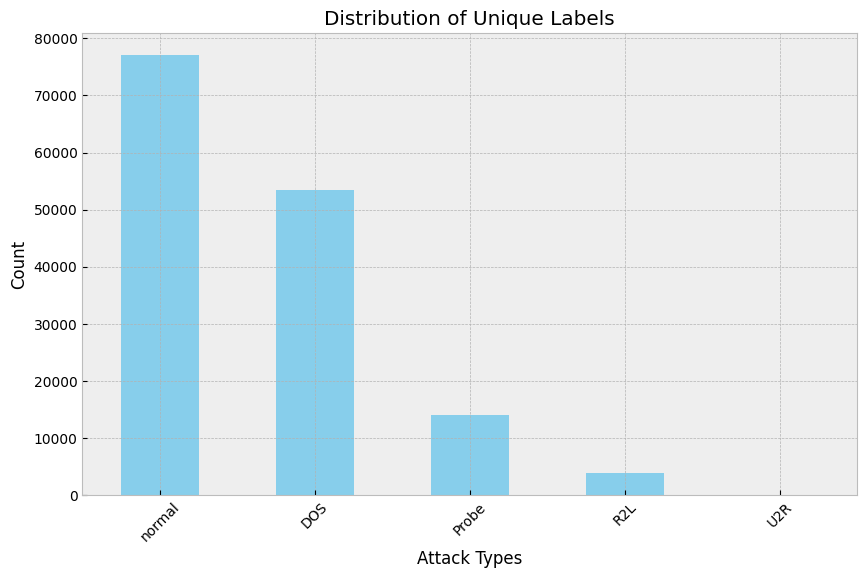

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count the occurrences of each unique label
label_counts = full_dataset['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unique Labels')
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
#One Hot Encoding
full_dataset = pd.get_dummies(full_dataset,drop_first=False)
#Train test split
features = list(full_dataset.columns[:-5])
y_train = np.array(full_dataset[:df_train.shape[0]][['label_normal','label_DOS','label_Probe','label_R2L','label_U2R']])
X_train = full_dataset[:df_train.shape[0]][features]

y_test = np.array(full_dataset[:df_test.shape[0]][['label_normal','label_DOS','label_Probe','label_R2L','label_U2R']])
X_test = full_dataset[:df_test.shape[0]][features]

In [13]:
#Scaling data
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = np.array(scaler.transform(X_train))
X_test_scaled = np.array(scaler.transform(X_test))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train_scaled, y_train)

# Predict using the trained KNN model
y_pred = knn.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {:.2f}%".format(accuracy * 100))


Accuracy : 99.69%


In [15]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12042
           1       1.00      1.00      1.00      8271
           2       1.00      0.99      0.99      2037
           3       0.95      0.92      0.94       183
           4       0.60      0.55      0.57        11

   micro avg       1.00      1.00      1.00     22544
   macro avg       0.91      0.89      0.90     22544
weighted avg       1.00      1.00      1.00     22544
 samples avg       1.00      1.00      1.00     22544



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


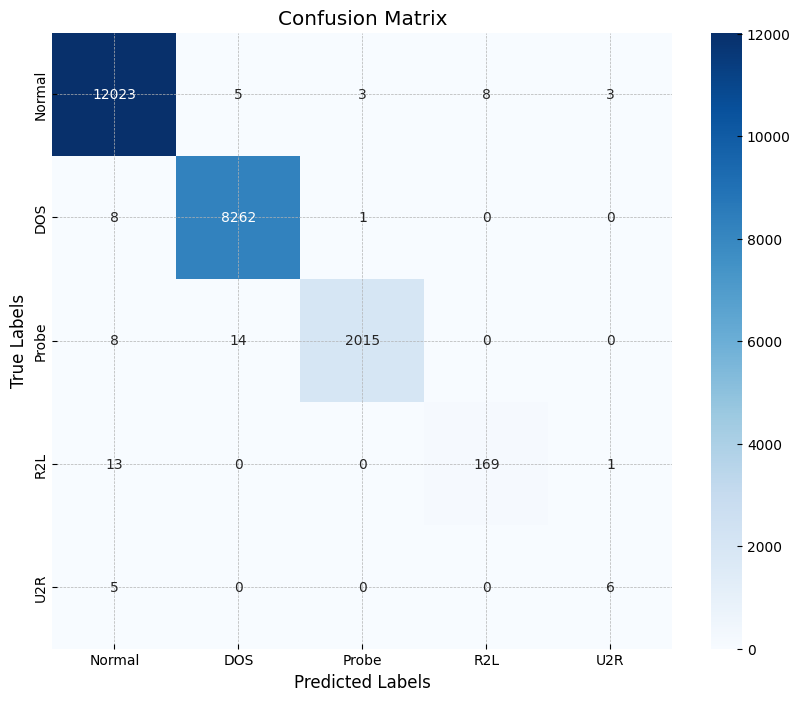

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'DOS', 'Probe', 'R2L', 'U2R'], yticklabels=['Normal', 'DOS', 'Probe', 'R2L', 'U2R'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
